**Logistic Regression to predict whether a Case will be Closed (Yes/No) based on features like victim info, crime type, and location:**

*Predict Case Closed (1 = Yes, 0 = No) using logistic regression*

In [5]:
# 1. Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# 2. Load the dataset
df = pd.read_csv('crime_dataset_india.csv')

In [7]:
df.columns

Index(['Report Number', 'Date Reported', 'Date of Occurrence',
       'Time of Occurrence', 'City', 'Crime Code', 'Crime Description',
       'Victim Age', 'Victim Gender', 'Weapon Used', 'Crime Domain',
       'Police Deployed', 'Case Closed', 'Date Case Closed'],
      dtype='object')

In [8]:
# 3. Preview the dataset
print(df.head())
print(df.info())

   Report Number     Date Reported Date of Occurrence Time of Occurrence  \
0              1  02-01-2020 00:00   01-01-2020 00:00   01-01-2020 01:11   
1              2  01-01-2020 19:00   01-01-2020 01:00   01-01-2020 06:26   
2              3  02-01-2020 05:00   01-01-2020 02:00   01-01-2020 14:30   
3              4  01-01-2020 05:00   01-01-2020 03:00   01-01-2020 14:46   
4              5  01-01-2020 21:00   01-01-2020 04:00   01-01-2020 16:51   

        City  Crime Code Crime Description  Victim Age Victim Gender  \
0  Ahmedabad         576    IDENTITY THEFT          16             M   
1    Chennai         128          HOMICIDE          37             M   
2   Ludhiana         271        KIDNAPPING          48             F   
3       Pune         170          BURGLARY          49             F   
4       Pune         421         VANDALISM          30             F   

    Weapon Used   Crime Domain  Police Deployed Case Closed  Date Case Closed  
0  Blunt Object  Violent Crime

In [9]:
# 4. Clean and preprocess the data
# Drop unused columns (like dates and report number)
df = df.drop(['Report Number', 'Date Reported', 'Date of Occurrence', 'Time of Occurrence', 'Date Case Closed'], axis=1)

In [10]:
# Remove rows with missing values
df = df.dropna()

In [11]:
# 5. Encode categorical variables
label_cols = ['City', 'Crime Description', 'Victim Gender', 'Weapon Used', 'Crime Domain', 'Case Closed']

le_dict = {}
for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    le_dict[col] = le  # Save label encoders if needed later

In [12]:
# 6. Feature selection and target variable
X = df.drop('Case Closed', axis=1)
y = df['Case Closed']

In [13]:
# 7. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
# 8. Train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [15]:
# 9. Make predictions
y_pred = model.predict(X_test)

In [16]:
# 10. Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[1603 1901]
 [1488 1882]]

Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.46      0.49      3504
           1       0.50      0.56      0.53      3370

    accuracy                           0.51      6874
   macro avg       0.51      0.51      0.51      6874
weighted avg       0.51      0.51      0.51      6874



***VISUALISATIONS***

**1. Confusion Matrix**

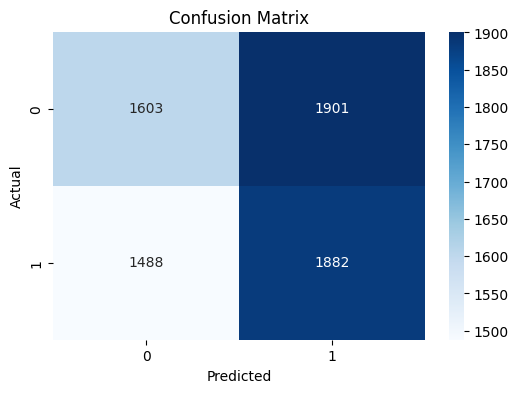

In [17]:
# 11. Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**2. Feature Importance**

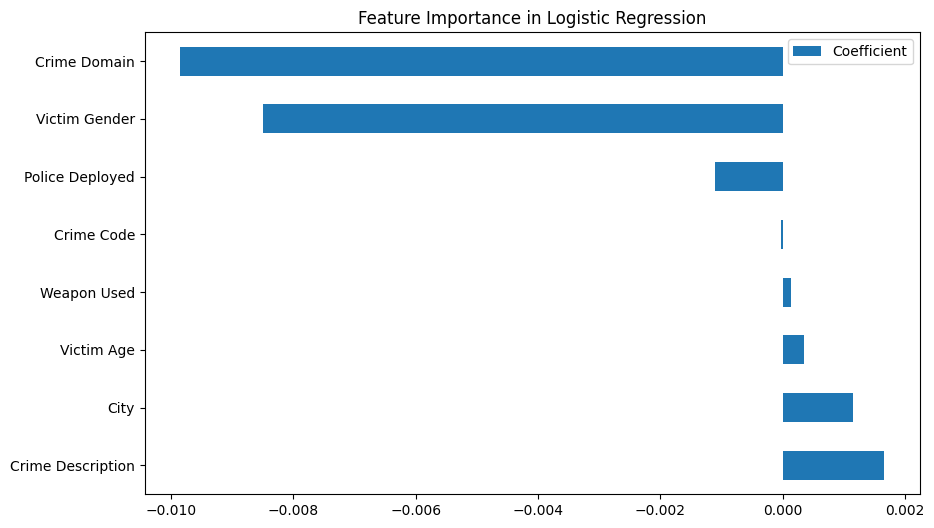

In [18]:
# 12. Feature Importance
coefficients = pd.DataFrame(model.coef_[0], index=X.columns, columns=['Coefficient'])
coefficients.sort_values(by='Coefficient', ascending=False).plot(kind='barh', figsize=(10,6))
plt.title('Feature Importance in Logistic Regression')
plt.show()

**3. Target Variable Distribution (Case Closed)**

<ipython-input-19-e3d61788440f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Case Closed', data=df, palette='Set2')


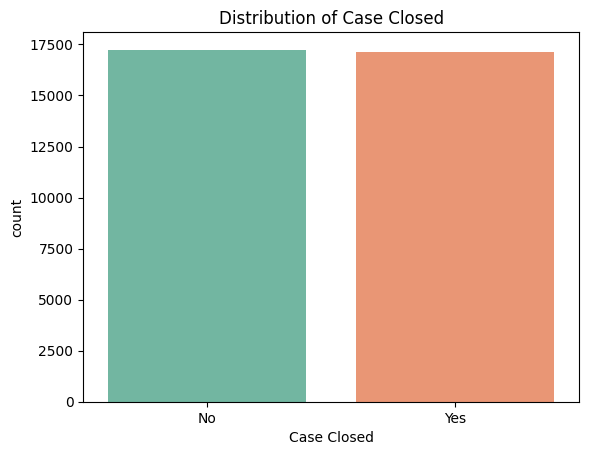

In [19]:
# Bar chart of case closed status
sns.countplot(x='Case Closed', data=df, palette='Set2')
plt.title('Distribution of Case Closed')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

**4. Crime Type Frequency**

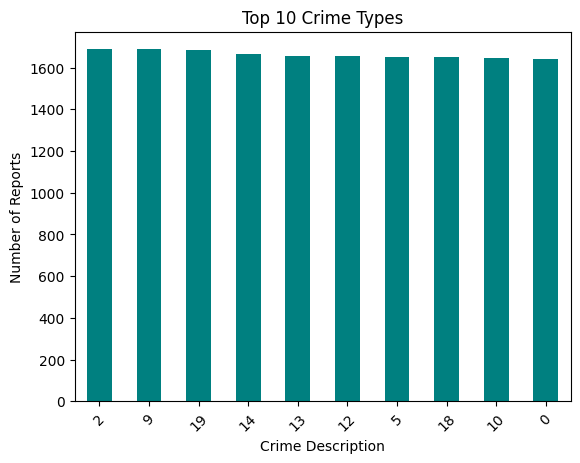

In [20]:
# Most frequent crimes
top_crimes = df['Crime Description'].value_counts().head(10)
top_crimes.plot(kind='bar', color='teal')
plt.title('Top 10 Crime Types')
plt.ylabel('Number of Reports')
plt.xlabel('Crime Description')
plt.xticks(rotation=45)
plt.show()

**5. Crime vs City Heatmap**

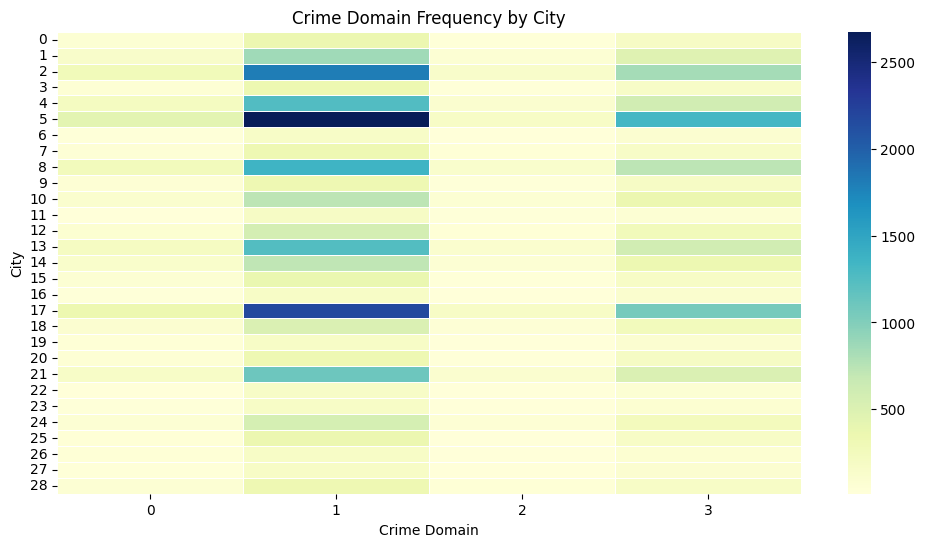

In [21]:
# Create pivot table
pivot = pd.pivot_table(df, values='Crime Code', index='City', columns='Crime Domain', aggfunc='count', fill_value=0)

# Plot heatmap
plt.figure(figsize=(12,6))
sns.heatmap(pivot, cmap='YlGnBu', linewidths=0.5)
plt.title('Crime Domain Frequency by City')
plt.xlabel('Crime Domain')
plt.ylabel('City')
plt.show()

**6. Victim Age Distribution**

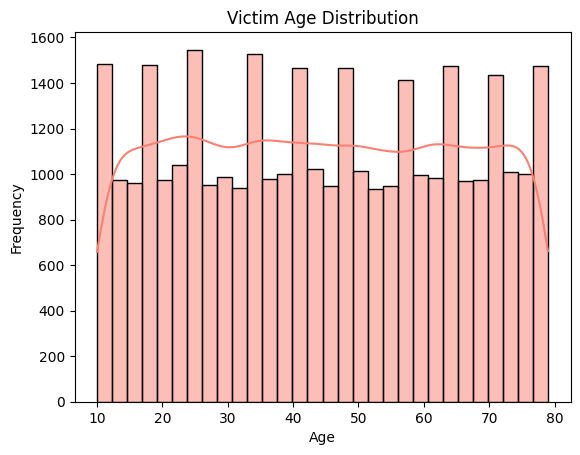

In [22]:
# Distribution of victim age
sns.histplot(df['Victim Age'], bins=30, kde=True, color='salmon')
plt.title('Victim Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

**7. Pair Plot of Important Features**

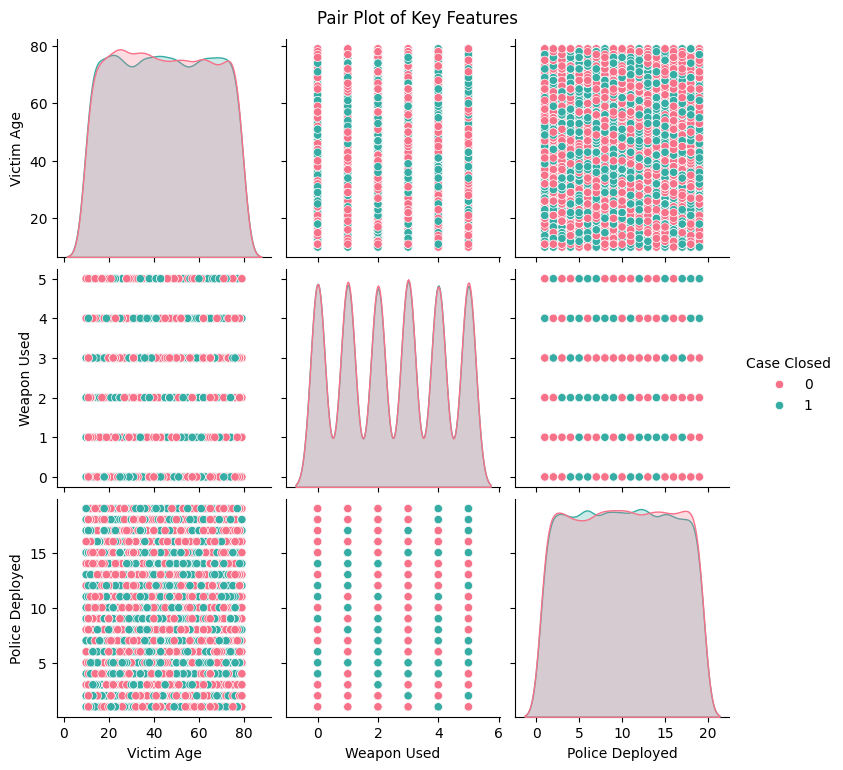

In [23]:
#select a few important columns to visualize relationships
selected_cols = ['Victim Age', 'Weapon Used', 'Police Deployed', 'Case Closed']
sns.pairplot(df[selected_cols], hue='Case Closed', palette='husl')
plt.suptitle('Pair Plot of Key Features', y=1.02)
plt.show()

**8. ROC Curve**

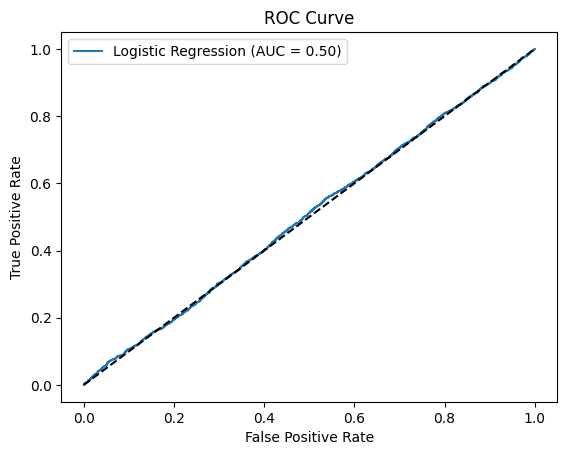

In [24]:
from sklearn.metrics import roc_curve, roc_auc_score

y_prob = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, label='Logistic Regression (AUC = {:.2f})'.format(auc))
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [26]:
import pickle

# ... (your existing code) ...

# After training the model:
with open('Crime Rate Prediction using Logistic Regression.pkl', 'wb') as file:
    pickle.dump(model, file)

from google.colab import files
files.download('Crime Rate Prediction using Logistic Regression.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>